Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
2025 - Bimestre 5 <br>


<h1><center> Procesamiento de Lenguaje Natural

Tarea 1: Hate Speech Detection </center></h1>
        **Profesor**: Marcelo Mendoza<br>

---

# Integrantes
* Estudiante 1:
* Estudiante 2:

# Instrucciones

* Deberás entregar SOLO el archivo .ipynb.
* Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
* El notebook debe tener todas las celdas de código ejecutadas.

# Librerías

In [1]:
#Incorpore las librerías en esta sección
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Introducción

El conjunto de datos utilizado en este estudio se construyó a partir de tweets obtenidos a través de la API de Twitter y filtrados utilizando un léxico de discurso de odio proporcionado por Hatebase.org. Inicialmente, se identificaron y recopilaron tweets que contenían términos específicos catalogados como discurso de odio por la comunidad. Este proceso resultó en una muestra de 85.4 millones de tweets, provenientes de 33,458 usuarios de Twitter.

Posteriormente, se realizó una selección aleatoria de tweets de esta muestra inicial para su análisis detallado. Estos tweets fueron evaluados manualmente por trabajadores de CrowdFlower (CF), quienes clasificaron cada tweet en una de tres categorías: discurso de odio, lenguaje ofensivo pero no discurso de odio, y ni ofensivo ni discurso de odio.

**Estructura del dataset**

Para el desarrollo de la tarea, se deben concentrar en dos columnas:

* tweet: Contiene la oración que debe ser evaluada.
* label: Clasificación asociada a cada sentencia de la variable tweet.

Respecto a la variable label, se tiene la siguiente codificación:

* 0 - discurso de odio
* 1 - lenguaje ofensivo
* 2 - ninguno

El conjunto de datos ya está divido en train (df_train) y test (df_test)

# 1.- Descripción del conjunto de datos (10 puntos)

Concatene ambos conjuntos de datos para tener una mirada general del dataset. Responda las siguiente preguntas:

1.1 Grafique el número de ejemplos por tipo de clase. ¿El dataset está balanceado?

1.2  Calcule el largo de las oraciones para cada clase, considerando el número de palabras. ¿Se observa algún patrón?

1.3 Para cada clase, presente las 40 palabras más frecuentes. Comente.

Respuesta:

In [6]:
# A continuación, se presenta el código para cargar los conjuntos de train y test
# Se supone que los conjuntos df_train.csv y df_test.csv ya están subidos en el entorno de google colab

path_train = 'data/raw/df_train.csv'
path_test = 'data/raw/df_test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [5]:
df_train

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,21744,3,0,3,0,1,Talking Angela is a hoe
1,12933,3,0,2,1,1,Lol they tricking niccas left n right
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...
...,...,...,...,...,...,...,...
19821,17438,3,0,0,3,2,RT @RayIopez: When you're approaching your hig...
19822,7241,3,0,3,0,1,@skyereyes_ @keanabermudez YOOOOOOOOOOOOOO LMF...
19823,16347,3,0,0,3,2,RT @KelsieBelsi: @Vntxnius lmao it will have a...
19824,23517,3,1,2,0,1,"Y'all hoes broke, be stealing from the mall bu..."


In [4]:
df_train['tweet'][0]

'Talking Angela is a hoe'

In [5]:
df_test

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,16183,3,0,3,0,1,RT @JimNorton: There is a GIFT SHOP at the 9-1...
1,3239,3,0,0,3,2,@Fabulousjonna_ I need some red green &amp; ye...
2,25097,3,0,3,0,1,this the one&#128076;RT @SumthinNueee hoes don...
3,365,3,0,3,0,1,"""@lildurk_: I can turn yo bitch into a eaterrr..."
4,16493,3,0,3,0,1,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...
...,...,...,...,...,...,...,...
4952,8198,3,0,2,1,1,Because of the message that sends to LGBTQ res...
4953,8435,3,0,3,0,1,Bruh this niggah always falls asleep ! &#12853...
4954,592,3,2,1,0,0,"""We're out here, and we're queer!""\n"" 2, 4, 6,..."
4955,18213,3,0,3,0,1,RT @TooTurntNacho: Why give a bitch ya heart w...


In [10]:
# revisemos las dimensiones de ambos datasets
df_train.shape, df_test.shape

((19826, 7), (4957, 7))

In [7]:
# Concatene ambos conjuntos de datos para tener una mirada general del dataset

df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(24783, 7)

In [8]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,tweet
0,21744,3,0,3,0,1,Talking Angela is a hoe
1,12933,3,0,2,1,1,Lol they tricking niccas left n right
2,997,3,0,3,0,1,&#128514;&#128514; bitches get stuff done. htt...
3,2534,3,0,3,0,1,@ArtaleGaspare bitch i got the flameeee
4,7470,3,0,3,0,1,@vivaalakatyy @brotherbill7 @JHuff_5 good bitc...


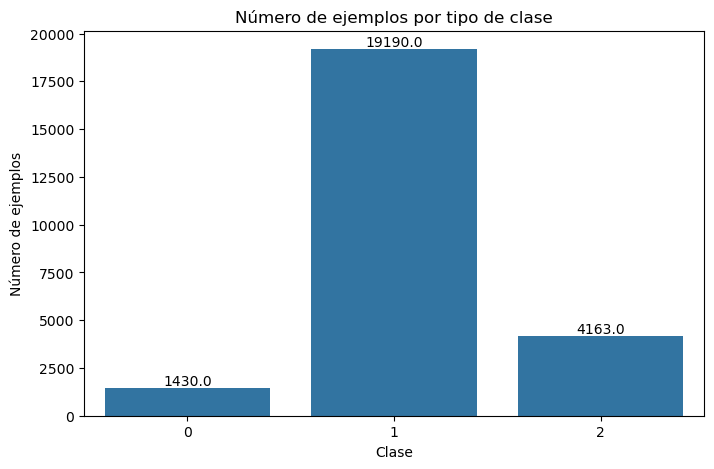

In [9]:
# 1.1 Grafique el número de ejemplos por tipo de clase.

# agregar etiquetas a las barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='label')
plt.title('Número de ejemplos por tipo de clase')
plt.xlabel('Clase')
plt.ylabel('Número de ejemplos')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [13]:
# ¿El dataset está balanceado?
# El dataset no está balanceado, ya que hay una diferencia significativa en el número de ejemplos entre las clases 0, 1 y 2.

In [10]:
# 1.2  Calcule el largo de las oraciones para cada clase, considerando el número de palabras

df['sentence_length'] = df['tweet'].apply(lambda x: len(x.split()))
df.groupby('label')['sentence_length'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,1430.0,13.906993,7.037868,1.0,8.0,13.5,20.0,32.0
1,19190.0,13.958624,6.802658,1.0,8.0,13.0,19.0,36.0
2,4163.0,14.919289,6.801590,1.0,9.0,15.0,20.0,52.0


In [11]:
# limpie el dataset eliminando los tweets que contienen URLs o menciones a otros usuarios (palabras que comienzan con "http" o "@").

import nltk
nltk.download('stopwords', download_dir='data/raw/nltk_data')

[nltk_data] Downloading package stopwords to data/raw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  2.- Preprocesamiento de texto (5 puntos)

Realice un preprocesamiento del texto. Justifique sus decisiones.

De implementar esta solución, siga trabajando con los conjuntos procesados para crear el clasificador del punto 3.

Respuesta:

# 3.- Entrenar clasificador con TF-IDF (10 puntos)

Construya la matriz TF-IDF para los conjuntos train y test. Indique el tamaño del vocabulario considerando el set de train.

Luego, entrene un clasificador mediante una técnica de machine learning.

Calcule las métricas Precision, Recall y F1-score para el conjunto test (general y por clase). Comente los resultados.

Respuesta:

# 4.- Matriz de confusión (5 puntos)

Construya una matriz de confusión con los resultados obtenidos en el punto 3. Interprete los resultados en el contexto del problema.

Respuesta: